In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [139]:
import matplotlib
import os
import re
import pandas as pd

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [197]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [4]:
file = open('/home/jamunoz/git/nuclear/data/Dat_Nuclear_Configurations/x03/Rho05/lammps_rho05_x03_nuclear_minkowskidat_1000000.txt', 'r')

In [6]:
file.read()

'1000000 3.281027 4778 14864 -1291 -487\n'

In [11]:
directory = '/home/jamunoz/git/nuclear/data/Dat_Nuclear_Configurations/'
pfracts = ['x03/','x04/','x05/']
densities = ['Rho05/','Rho085/']

In [17]:
os.chdir('/home/jamunoz/git/nuclear/data/Dat_Nuclear_Configurations/')

In [21]:
filenames = [os.path.abspath(x) for x in os.listdir()]

In [100]:
filenames[0]

'/home/jamunoz/git/nuclear/data/Dat_Nuclear_Configurations/lammps_rho05_x03_nuclear_minkowskidat_1000000.txt'

In [108]:
def get_rho_prop_from_filename(filename):
    r1 = str(re.findall("rho.+?_", filename))
    init = r1.find('0')
    end = r1.find('_')
    if '05' == r1[init:end]:
        rho = 0.05
    elif '06' == r1[init:end]:
        rho = 0.06
    elif '07' == r1[init:end]:
        rho = 0.07
    elif '085' == r1[init:end]:
        rho = 0.085
    else:
        rho = np.inf
        
    r2 = str(re.findall("x.+?_", filename))
    init = r2.find('0')
    end = r2.find('_')
    if '03' == r2[init:end]:
        prop = 0.3
    elif '04' == r2[init:end]:
        prop = 0.4
    elif '05' == r2[init:end]:
        prop = 0.5
    
    
    return rho, prop

In [133]:
X = []
y = []
for filename in filenames:
    rho, prop = get_rho_prop_from_filename(filename)
    file = open(filename,'r')
    aStr = file.read()
    contents = aStr.split()
    temp = float(contents[1])
    euler = float(contents[5])
    
    X.append([temp, rho, prop])
    y.append(euler)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [201]:
clf = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50), max_iter=2000, solver='lbfgs', activation='tanh')
clf.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [202]:
rho_vals = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085]

In [228]:
prop = 0.3

In [229]:
aDict = {}
for temp in [2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)

In [219]:
df = pd.DataFrame(aDict)

In [231]:
prop = 0.3
aDictpp = {}
for temp in range(20, 51):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

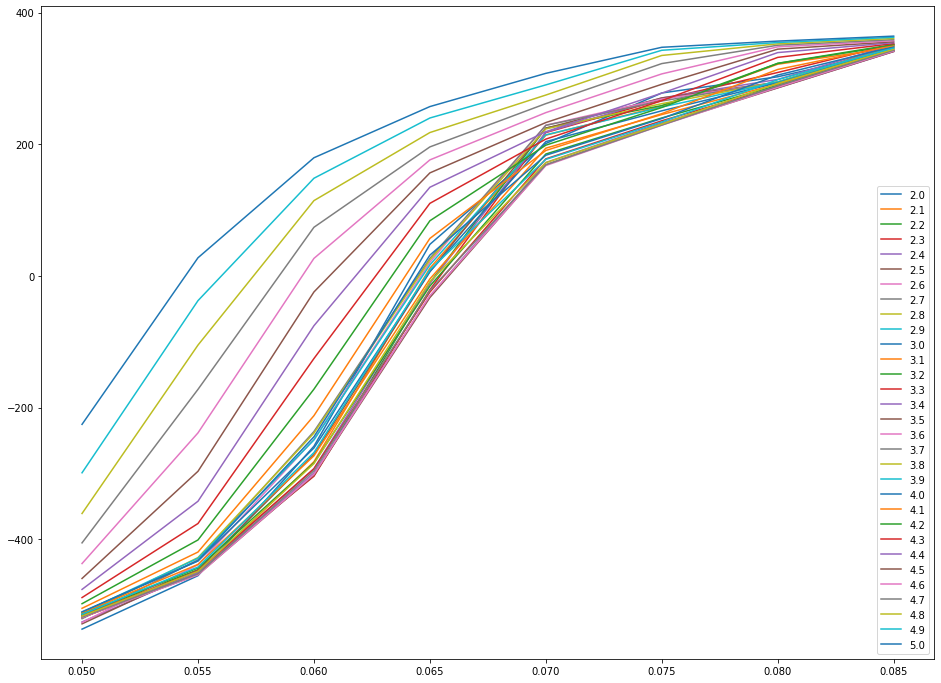

In [232]:
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

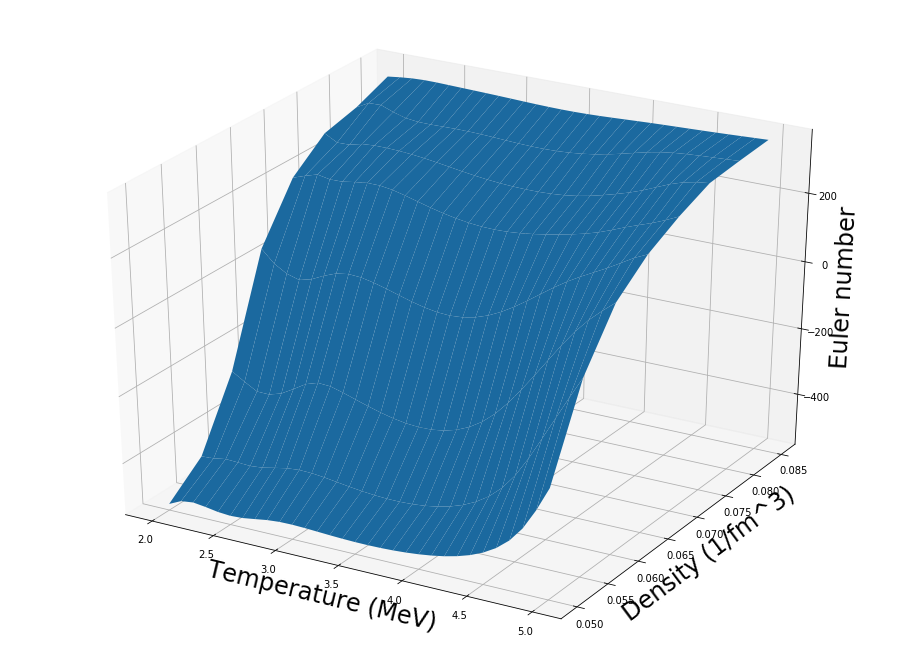

In [234]:
## prop = 0.3
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [235]:
prop = 0.4
aDict = {}
for temp in [2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)
    
df = pd.DataFrame(aDict)

In [236]:
prop = 0.4
aDictpp = {}
for temp in range(20, 51):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

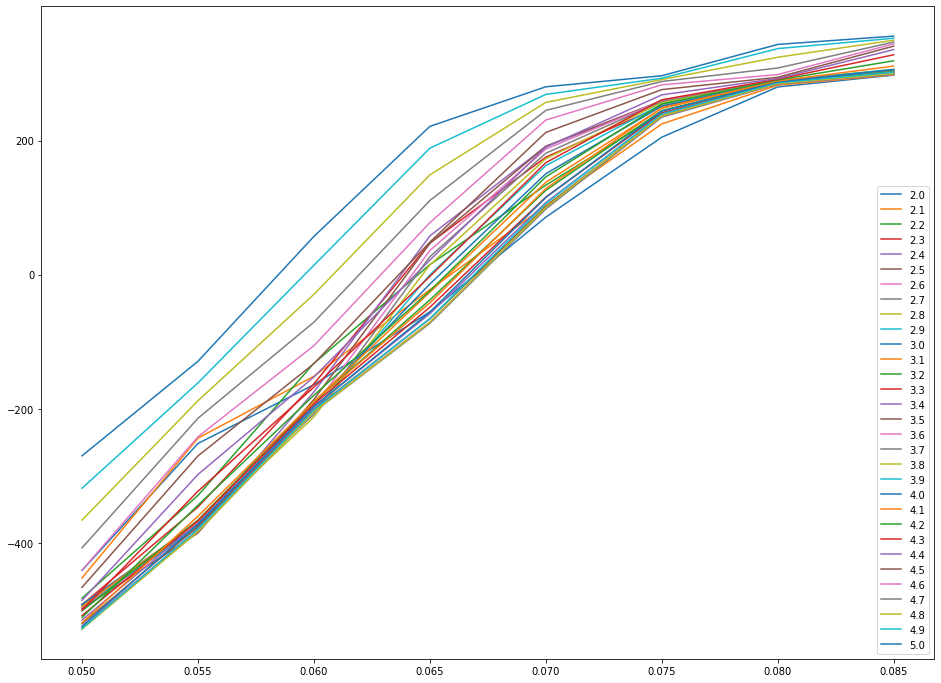

In [237]:
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

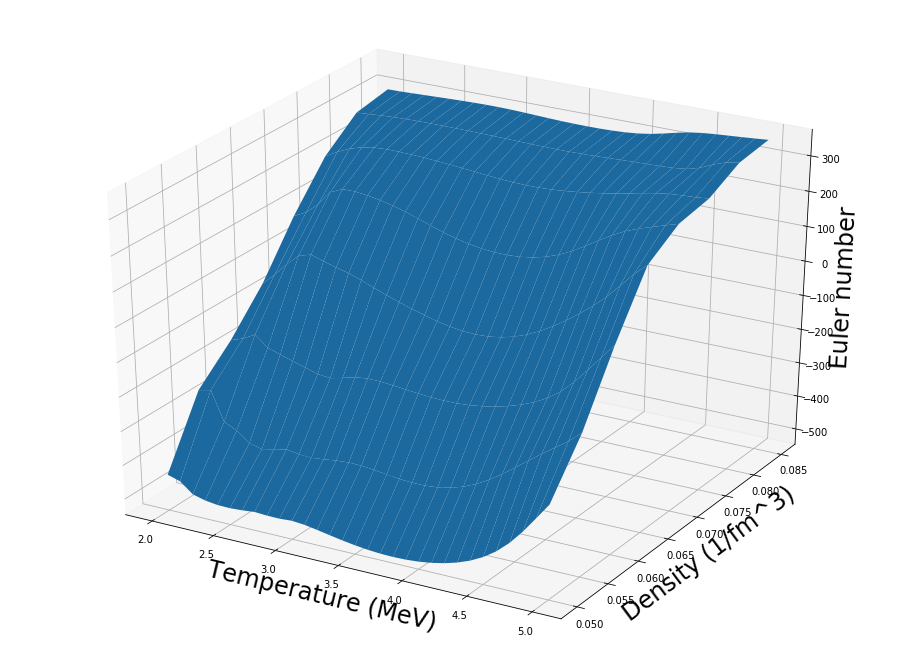

In [238]:
## prop = 0.4
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [239]:
prop = 0.5
aDict = {}
for temp in [2.0, 3.0, 4.0]:
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[temp, rho, prop]])))
    aDict[temp] = pd.Series(aList, index=rho_vals)
    
df = pd.DataFrame(aDict)

In [240]:
prop = 0.5
aDictpp = {}
for temp in range(20, 51):
    Tpp = temp/10.0
    aList = []
    for rho in rho_vals:
        aList.append(np.asscalar(clf.predict([[Tpp, rho, prop]])))
    aDictpp[Tpp] = pd.Series(aList, index=rho_vals)

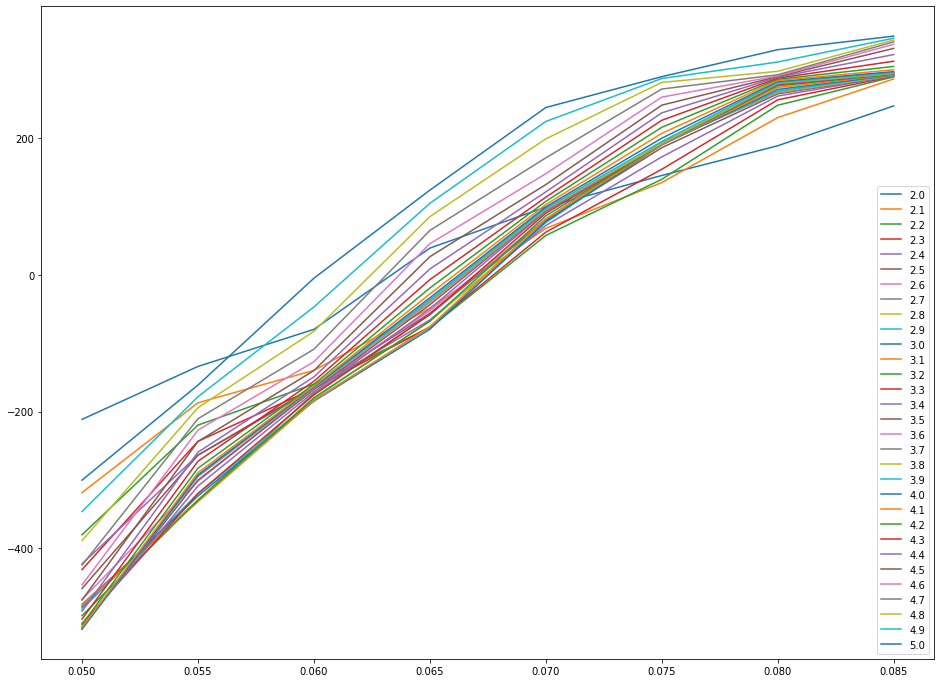

In [241]:
dfpp = pd.DataFrame(aDictpp)
dfpp.plot(figsize=(16, 12))

Text(0.5, 0, 'Euler number')

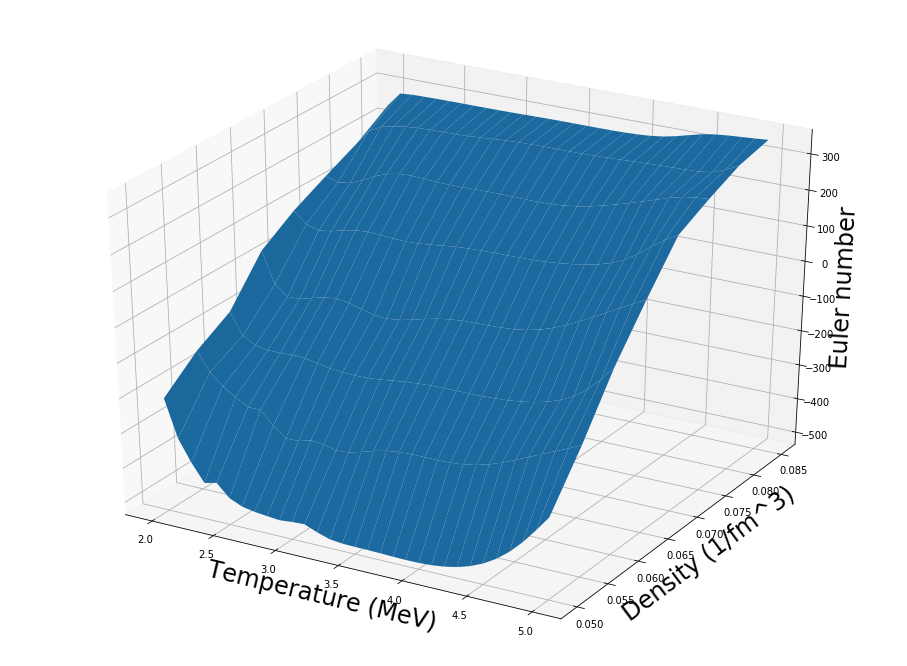

In [242]:
## prop = 0.5
xx = dfpp.columns
yy = dfpp.index
XX,YY = np.meshgrid(xx,yy)
ZZ = dfpp.values
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.set_xlabel('Temperature (MeV)', fontsize=24)
ax.set_ylabel('Density (1/fm^3)', fontsize=24)
ax.set_zlabel('Euler number', fontsize=24)

In [249]:
for i in range(len(X_test)):
    temp, rho, prop = X_test[i]
    y = y_test[i]
    prediction = clf.predict([[temp, rho, prop]])[0]
    print(temp, rho, prop, y, prediction, abs((prediction-y)/y))

4.10174 0.05 0.4 -534.0 -518.7012884705445 0.02864927252707031
1.299144 0.085 0.4 258.0 236.30008275589853 0.08410820637248632
3.763403 0.085 0.5 265.0 294.94105898722756 0.11298512825368892
3.509198 0.085 0.5 295.0 294.64623303267587 0.0011992100587258777
1.614931 0.05 0.3 -558.0 -559.7949972556007 0.0032168409598579205
0.399468 0.085 0.5 6.0 25.18957075820027 3.198261793033378
2.4589 0.085 0.4 315.0 302.71410183473847 0.039002851318290566
2.280382 0.05 0.3 -513.0 -517.7338424396575 0.009227763040267936
3.473768 0.06 0.5 -210.0 -168.53403812572253 0.19745696130608317
3.769791 0.085 0.4 300.0 299.58430232555446 0.001385658914818464
2.774677 0.06 0.5 -186.0 -178.00814701128706 0.042966951552220085
3.090079 0.05 0.3 -531.0 -511.621709711833 0.03649395534494731
3.097643 0.05 0.4 -524.0 -494.60734407875833 0.0560928548115299
3.041659 0.05 0.3 -519.0 -510.96011107782306 0.015491115456988329
0.793162 0.05 0.3 -733.0 -730.7813302247982 0.003026834618283439
3.277209 0.07 0.5 123.0 89.498843801

0.766674 0.07 0.5 99.0 117.7064174130548 0.18895371124297772
3.955991 0.085 0.4 330.0 303.6356409214205 0.07989199720781674
0.741161 0.05 0.4 251.0 243.9658987815863 0.028024307643082454
1.469765 0.085 0.4 273.0 287.9443251413275 0.05474111773380041
2.150049 0.05 0.3 -536.0 -514.7990870144762 0.0395539421371713
1.132176 0.05 0.4 187.0 236.8561067511248 0.2666101965300791
0.758025 0.085 0.5 126.0 138.29970975818375 0.09761674411256946
3.687217 0.06 0.5 -156.0 -165.07662746905208 0.05818350941700054
2.694952 0.05 0.3 -493.0 -520.8013303784461 0.05639215086905902
1.648583 0.05 0.4 -131.0 -174.51867490286543 0.3322036252127132
1.315253 0.05 0.3 -628.0 -569.2040065205549 0.09362419343860683
2.806635 0.06 0.5 -173.0 -179.60665082191898 0.03818873307467616
3.163184 0.05 0.3 -483.0 -512.9627061813206 0.06203458836712348
0.923533 0.05 0.3 -724.0 -707.9035470541858 0.022232669814660547
3.453476 0.05 0.5 -486.0 -514.7745993798588 0.059206994608763046
2.320262 0.07 0.5 105.0 64.49402664332828 0.38

0.598125 0.085 0.3 191.0 118.26226375626055 0.3808258442080599
3.718237 0.07 0.5 116.0 95.71236767387438 0.17489338212177258
2.78707 0.05 0.4 -524.0 -493.0176532836588 0.0591266158708802
0.626719 0.085 0.5 110.0 71.74145386591576 0.34780496485531126
2.145134 0.06 0.5 -171.0 -151.15591795951735 0.11604726339463536
4.013531 0.05 0.4 -519.0 -523.5917563764655 0.00884731479087759
2.289593 0.085 0.3 334.0 351.62664038527583 0.052774372411005493
2.541287 0.085 0.3 322.0 350.04723852047437 0.08710322521886449
3.173939 0.085 0.3 334.0 342.6001603534818 0.025748983094256835
0.610582 0.085 0.5 110.0 82.03562456792395 0.25422159483705503
1.087287 0.085 0.4 181.0 168.5038092969472 0.06903972764117572
0.271435 0.06 0.5 9.0 1.0365948170549828 0.8848227981050019
2.102764 0.05 0.3 -569.0 -518.509364110469 0.08873573970040588
2.992557 0.07 0.5 101.0 78.02279941581796 0.2274970354869509
3.244027 0.06 0.5 -227.0 -178.1612802554373 0.21514854513023213
3.967658 0.07 0.5 55.0 98.7498868932893 0.795452488968

3.82344 0.05 0.3 -516.0 -515.8737729366092 0.00024462609184271877
3.152548 0.085 0.4 313.0 303.3904089648846 0.03070156880228558
2.940886 0.085 0.3 347.0 345.7149539543884 0.003703302725105417
2.173963 0.085 0.4 307.0 298.8271316729787 0.026621720934922866
3.403121 0.05 0.4 -546.0 -514.856663679244 0.057039077510542165
0.950866 0.085 0.5 206.0 173.64108855632966 0.15708209438674922
3.724916 0.07 0.5 96.0 95.74323671504328 0.002674617551632489
4.103559 0.06 0.5 -117.0 -162.50402820592083 0.38892331799932334
3.578853 0.085 0.3 348.0 341.3450199762249 0.01912350581544576
4.062286 0.085 0.5 322.0 298.9371927891788 0.07162362487832663
0.95131 0.06 0.5 165.0 154.43257157865511 0.06404502073542355
0.312361 0.05 0.5 16.0 1.2962776262940068 0.9189826483566246
2.101623 0.06 0.5 -142.0 -140.09072972080332 0.013445565346455463
2.523886 0.085 0.3 357.0 350.23475653477055 0.018950261807365396
3.905686 0.085 0.5 312.0 295.9571425582409 0.051419414877433046
4.052503 0.07 0.5 107.0 101.20057886847144 0